In [1]:
from IPython.display import Image

## Today's Agenda
- Breadth first search
- Depth first search
- Dijkstra’s Algorithm

## Graph traversals 
- **Problem** For an arbitrary graph $G=(V,E)$ and a starting node $s$, find all nodes reachable from $s$ (i.e., there exists a path from $s$)
    - *Goal* Possibly “do something” for each node
    - **Examples:** print to output, set a field, etc.
- **Basic idea:**
    - Keep following nodes
    - But “mark” nodes after visiting them, so the traversal terminates and processes each reachable node exactly once
- Breadth first search
- Depth first search

### Breadth First Search
- Breadth First Search (BFS) is one of the easiest algorithms to search a graph
- Given a graph $G=(V,E)$ and starting vertex $s\in V$ BFS explores edges in the graph to find all vertices for which there is a path from s.
- Note: BFS finds all vertices at distance $k$ from $s$, before any vertices at distance $k+1$.

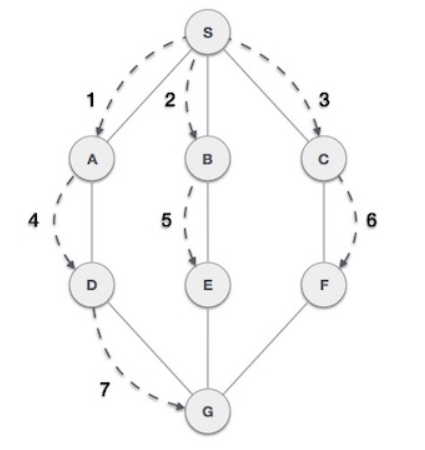

In [2]:
Image(filename='images/week-11/BFS.png', width=250)

#### Implementing Breadth First Search

- To visualize BFS, imagine that it is building one level at a time
- BFS adds all neigbours (children) of the starting vertex
- Then it begins to discover any of next neigbours (grandchildren) 

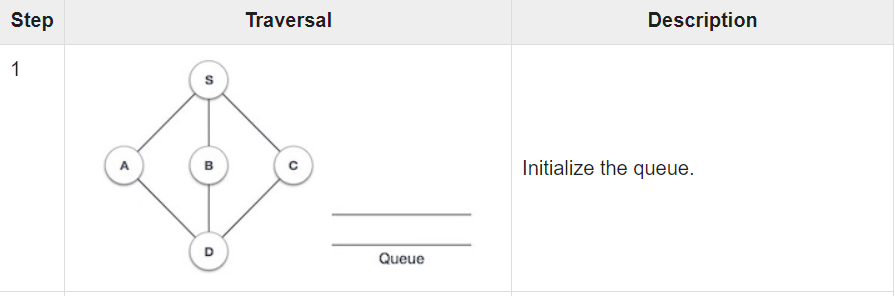

In [3]:
Image(filename='images/week-11/bfs1.png', width=600)

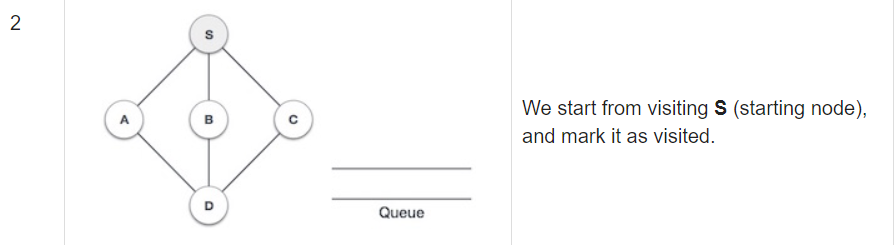

In [4]:
Image(filename='images/week-11/bfs2.png', width=600)

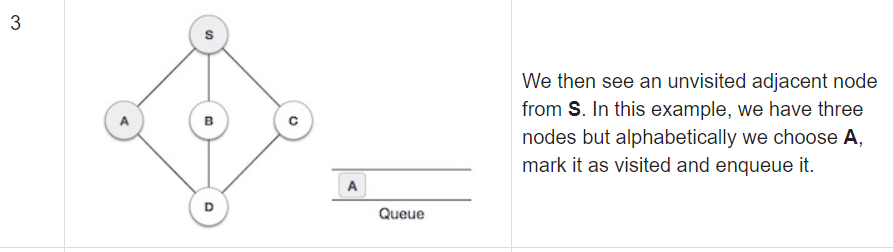

In [5]:
Image(filename='images/week-11/bfs3.png', width=600)

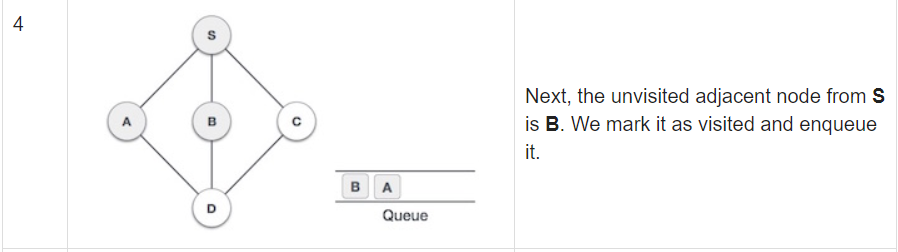

In [6]:
Image(filename='images/week-11/bfs4.png', width=600)

#### BFS algorithm
- **Rule 1** Visit the adjacent unvisited vertex. Mark it as visited. Display it. Insert it in a queue.
- **Rule 2** If no adjacent vertex is found, remove the first vertex from the queue.
- **Rule 3** Repeat **Rule 1**  and **Rule 2**  until the queue is empty.

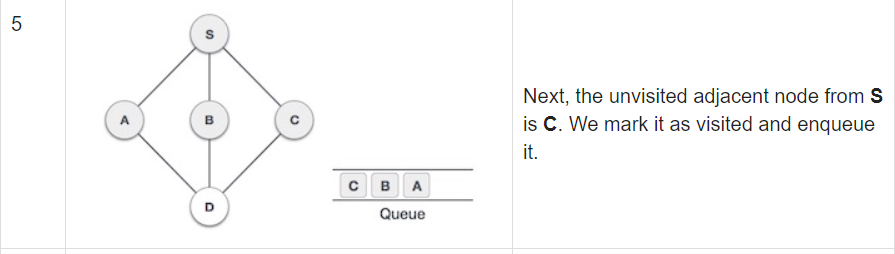

In [7]:
Image(filename='images/week-11/bfs5.png', width=600)

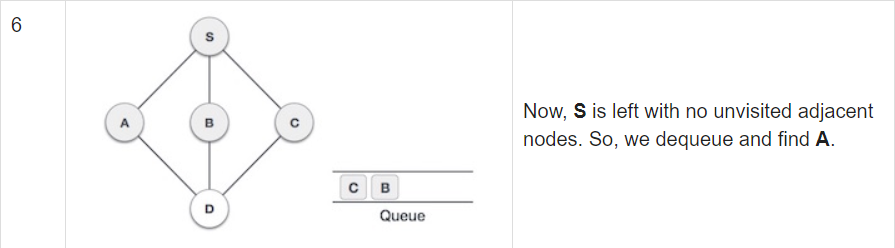

In [8]:
Image(filename='images/week-11/bfs6.png', width=600)

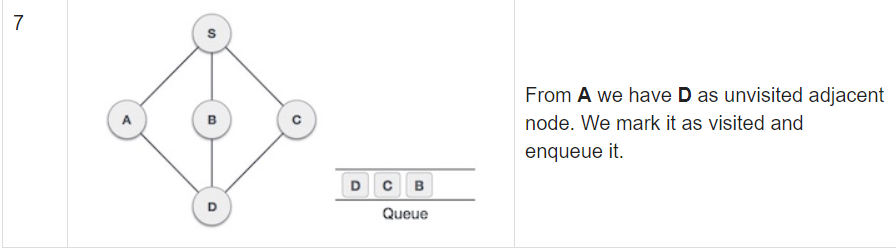

In [9]:
Image(filename='images/week-11/bfs7.png', width=600)

### Depth First Search

- Depth First Search (DFS) recursively explore one part before going back to the other parts not yet explored

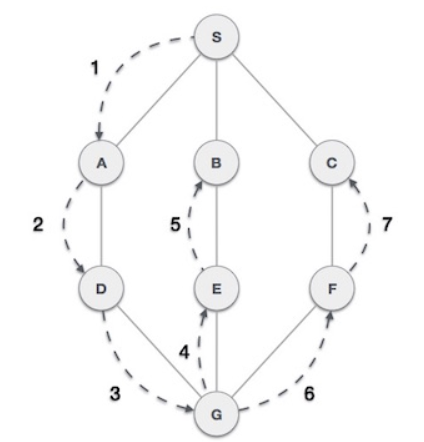

In [10]:
Image(filename='images/week-11/DFS.png', width=250)

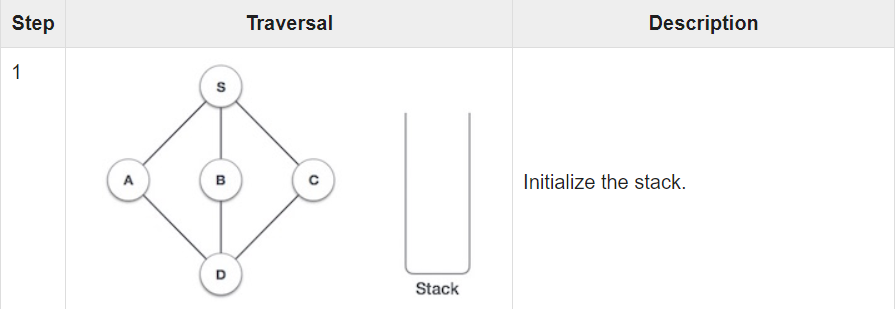

In [11]:
Image(filename='images/week-11/dfs1.png', width=600)

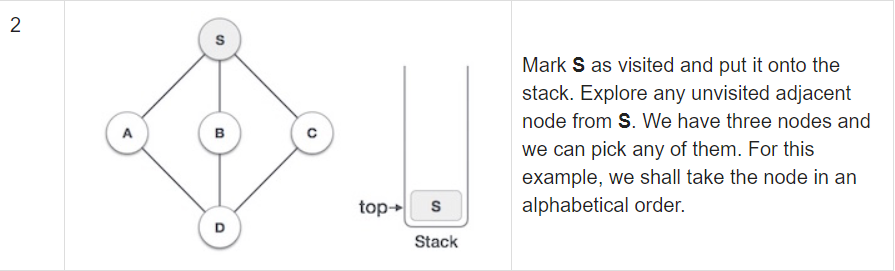

In [12]:
Image(filename='images/week-11/dfs2.png', width=600)

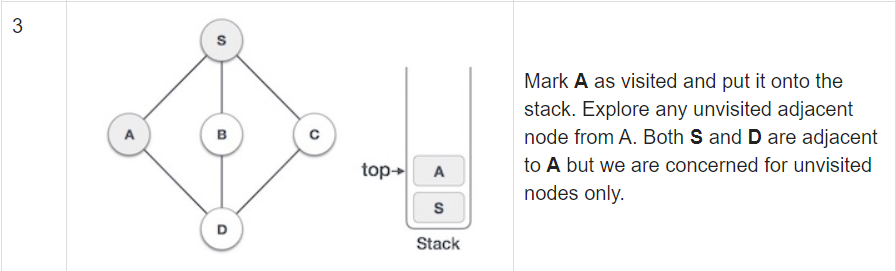

In [13]:
Image(filename='images/week-11/dfs3.png', width=600)

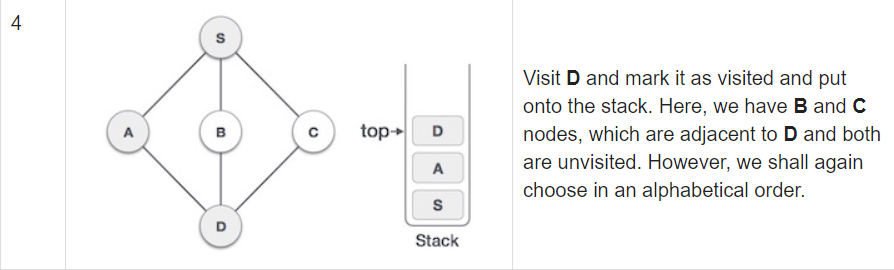

In [14]:
Image(filename='images/week-11/dfs4.png', width=600)

#### DFS algorithm
- **Rule 1** Visit the adjacent unvisited vertex. Mark it as visited. Display it. Push it in a stack.
- **Rule 2** If no adjacent vertex is found, pop up a vertex from the stack. (It will pop up all the vertices from the stack, which do not have adjacent vertices.)
- **Rule 3** Repeat **Rule 1**  and **Rule 2**  until the stack is empty.

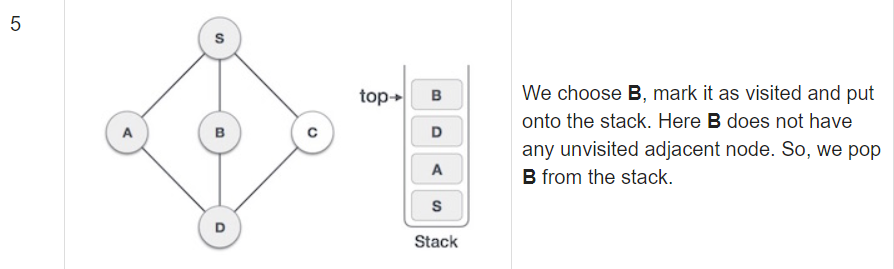

In [15]:
Image(filename='images/week-11/dfs5.png', width=600)

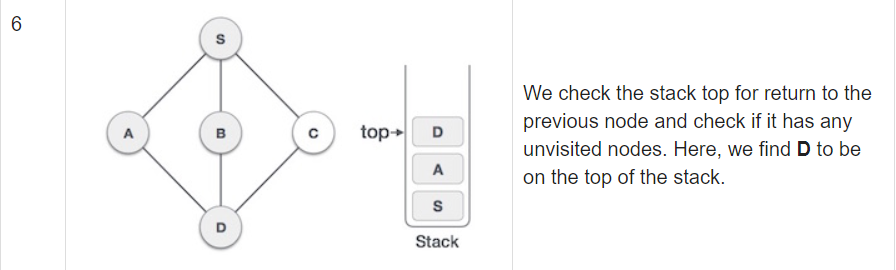

In [16]:
Image(filename='images/week-11/dfs6.png', width=600)

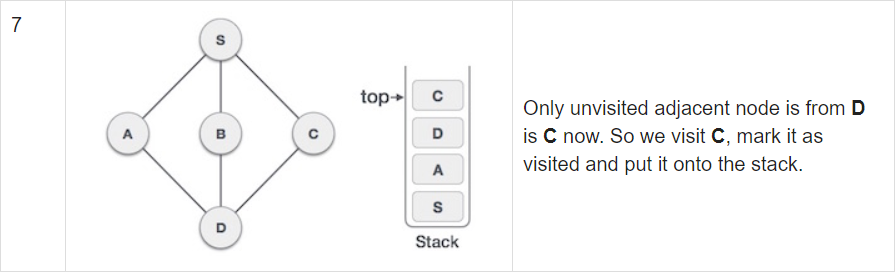

In [17]:
Image(filename='images/week-11/dfs7.png', width=600)

## Shortest Paths
- Goal: Find the shortest path from a given start node to all other nodes in terms of the weights on the edges.

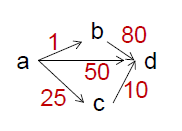

In [18]:
Image(filename='images/week-11/sp1.png', width=200)

### Dijkstra's Algorithm

- The idea: similar to BFS, but adapted to handle weights
    - Grow the set of nodes whose shortest distance has been computed
    - Nodes not in the set will have a “best distance so far”
    - A priority queue will turn out to be useful for efficiency
- An example of a greedy algorithm
    - A series of steps
    - At each one the locally optimal choice is made

- Initially, start node has cost 0 and all other nodes have cost $\infty$
- At each step:
    - Pick closest unknown vertex v
    - Add it to the “cloud” of known vertices
    - Update distances for nodes with edges from v
    
- Dijkstra’s algorithm is utilized to find the shortest path from a single source vertex to all other vertices in the given graph. 
- Dijkstra’s algorithm works for both directed and undirected graphs.
- Assume that the weights are positive.
- Dijkstra’s algorithm makes a tree of the shortest path from the starting node, the source, to all other nodes (points) in the graph. 
- This algorithm is also known as the single-source shortest path algorithm.  

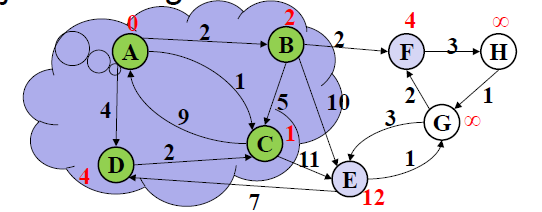

In [19]:
Image(filename='images/week-11/sp2.png', width=400)

### The Algorithm
- 1. For each node $v$, set $v.cost = \infty$ and $v.known = false$
- 2. Set $source.cost = 0$ // start node
- 3. While there are unknown nodes in the graph
    - a) Select the unknown node $v$ with lowest cost
    - b) Mark $v$ as known
    - c) For each edge $(v,u)$ with weight $w$,
        - $c1 = v.cost + w$ // cost of best path through $v$ to $u$
        - $c2 = u.cost$ // cost of best path to $u$ previously known
        - if $(c1 < c2)${ // if the path through $v$ is better
            - $ u.cost = c1$
            - $u.path = v$ // for computing actual paths
}

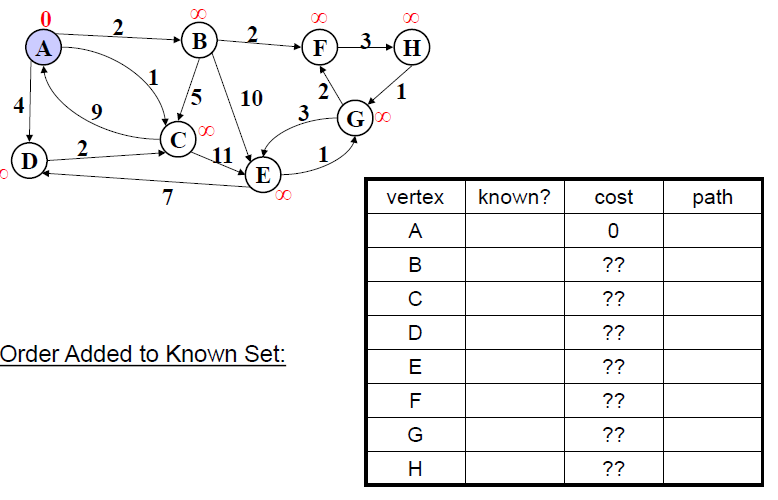

In [20]:
Image(filename='images/week-11/dks1.png', width=500)

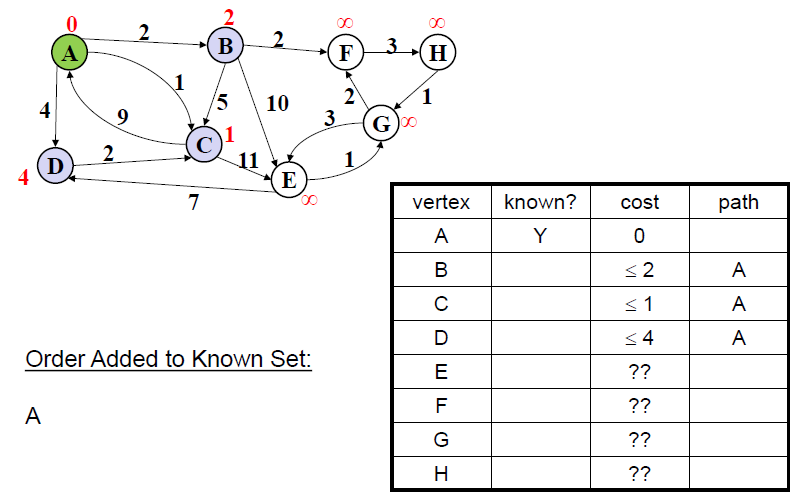

In [21]:
Image(filename='images/week-11/dks2.png', width=500)

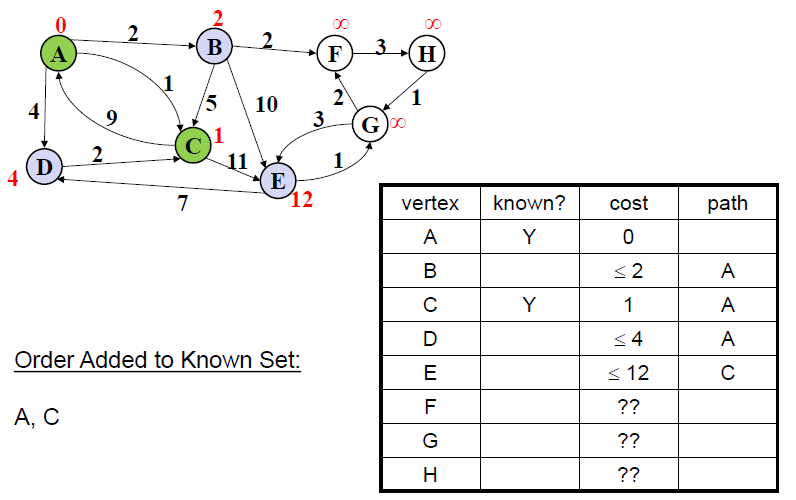

In [22]:
Image(filename='images/week-11/dks3.png', width=500)

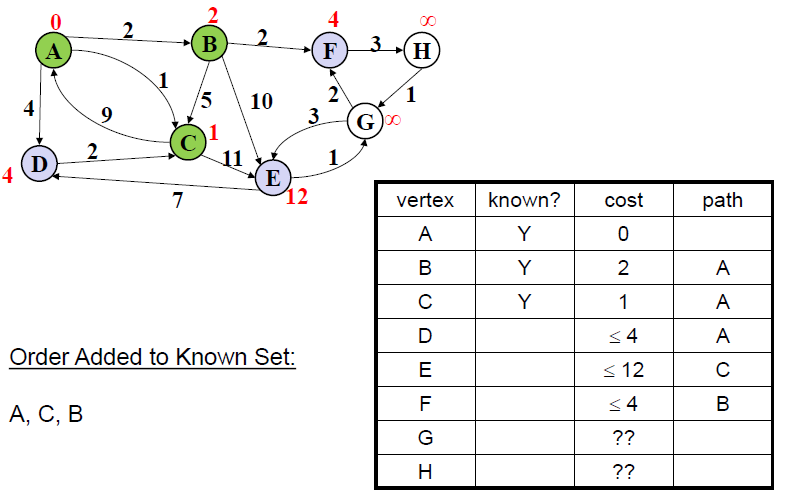

In [23]:
Image(filename='images/week-11/dks4.png', width=500)

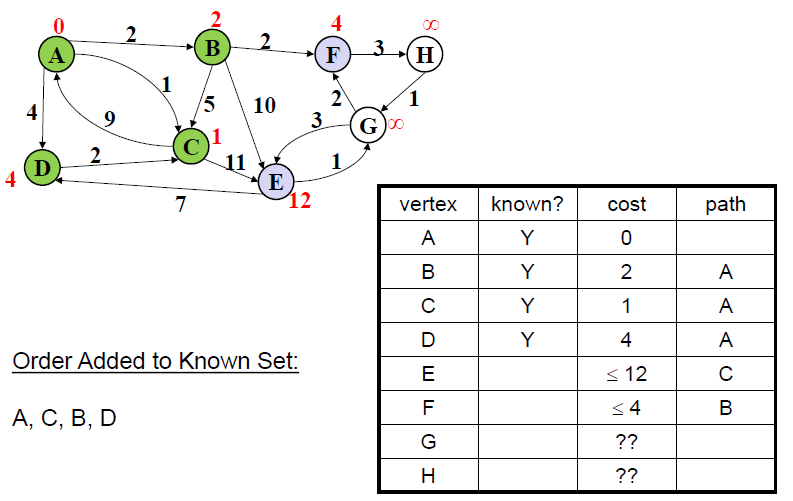

In [24]:
Image(filename='images/week-11/dks5.png', width=500)

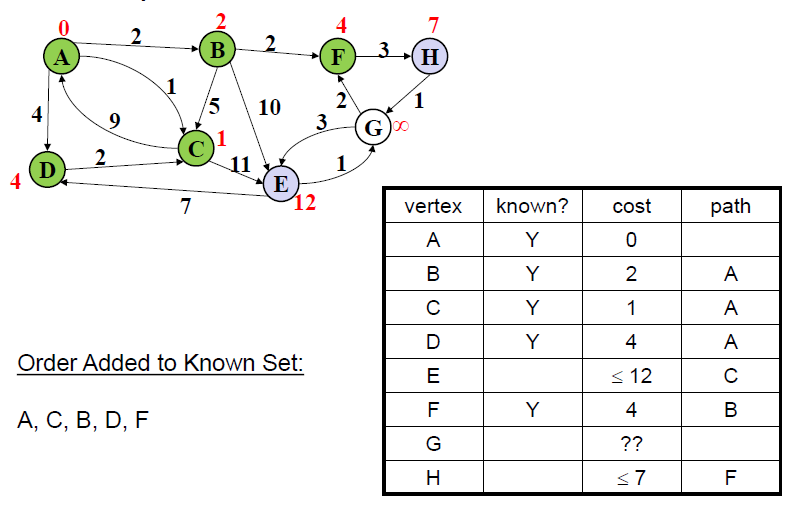

In [25]:
Image(filename='images/week-11/dks6.png', width=500)

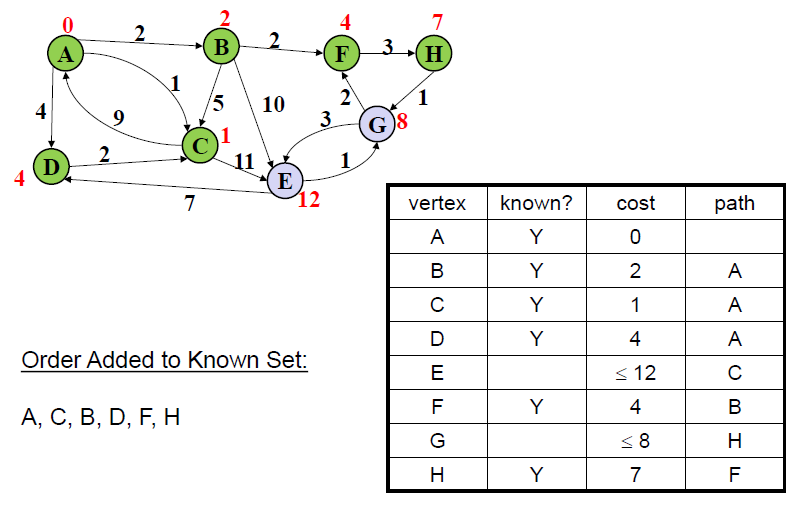

In [26]:
Image(filename='images/week-11/dks7.png', width=500)

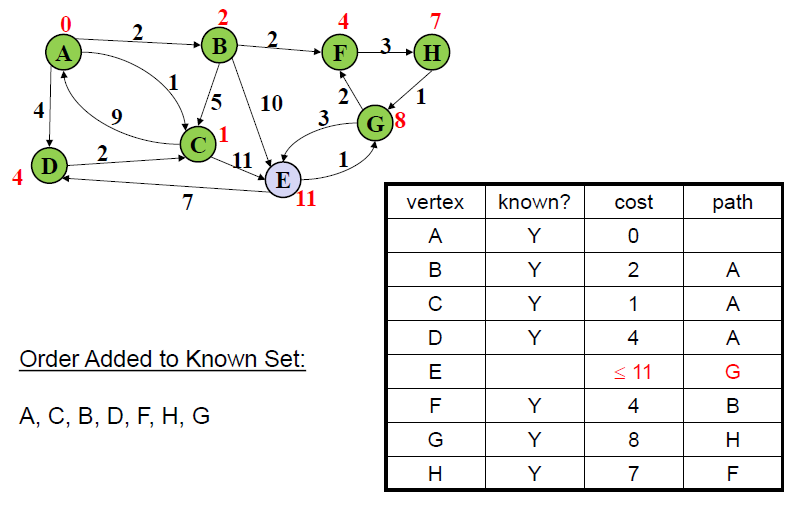

In [27]:
Image(filename='images/week-11/dks8.png', width=500)

### Features

- When a vertex is marked known, the cost of the shortest path to that node is known
    - The path is also known by following back-pointers
- While a vertex is still not known, another shorter path to it might still be found

#### Dijkstra's implementation by adjacency matrix representation of the graph is below.

In [28]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)

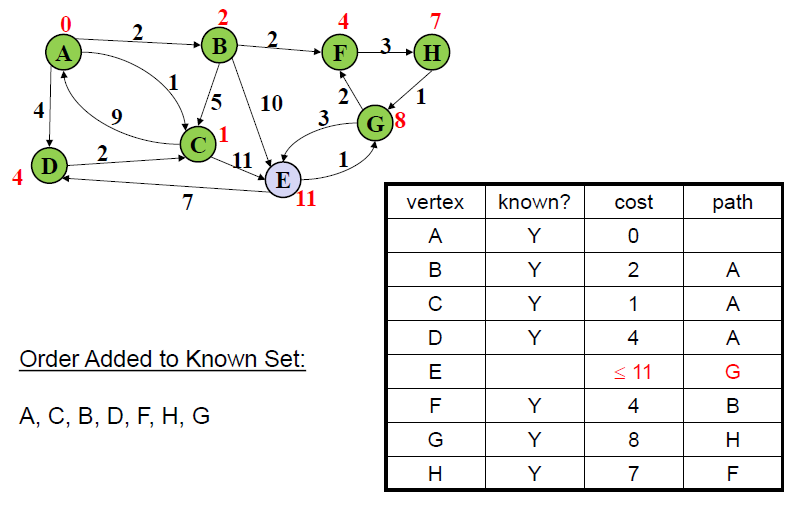

In [29]:
Image(filename='images/week-11/dks8.png', width=500)

In [30]:
# Driver program
gg = Graph(8)
gg.graph = [
           [0, 2, 1, 4, 0, 0, 0, 0],
           [0, 0, 5, 0, 10, 2, 0, 0],
           [9, 0, 0, 0, 11, 0, 0, 0],
           [0, 0, 2, 0, 0, 0, 0, 0],
           [0, 0, 0, 7, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 3],
           [0, 0, 0, 0, 3, 2, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0]
           ]
gg.dijkstra(0)

Vertex 	 Distance from Source
0 		 0
1 		 2
2 		 1
3 		 4
4 		 11
5 		 4
6 		 8
7 		 7


In [31]:
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
g.dijkstra(7)

Vertex 	 Distance from Source
0 		 8
1 		 11
2 		 7
3 		 14
4 		 13
5 		 3
6 		 1
7 		 0
8 		 7


### Notes: 
<ol>
<li>The code is for undirected graphs, the same Dijkstra function can be used for directed graphs also.</li>
<li>The code finds the shortest distances from the source to all vertices, but after simple modification, it can find the shortest distance from the source to a single target,(just break the for loop when the picked minimum distance vertex is equal to the target.</li>
<li>Time Complexity of the implementation is $\mathcal{O}(V^{2})$, however if the input graph is represented using adjacency list, it can be reduced to $\mathcal{O}(E\log{V})$ with the help of a binary heap.</li>
<li>Dijkstra’s algorithm doesn’t work for graphs with negative weight cycles.</li>
</ol>